In [129]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
data_df = pandas.read_csv('ds_salaries.csv')
data_df.head()

pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 50)

### collection des données qui nous interesse

In [130]:
# Suppression des colonnes inutiles telles que work_year, salary, salary_currency, employee_residence, remote_ratio, et employment_type pour épurée les données.
colonnes_supp =['work_year','salary','salary_currency','employee_residence','remote_ratio','employment_type']
data_df.drop(colonnes_supp, axis=1, inplace=True)  # on supprime les colonnes non utiles

In [131]:
data_df.head()

,experience_level,job_title,salary_in_usd,company_location,company_size
0,SE,Principal Data Scientist,85847,ES,L
1,MI,ML Engineer,30000,US,S
2,MI,ML Engineer,25500,US,S
3,SE,Data Scientist,175000,CA,M
4,SE,Data Scientist,120000,CA,M


In [132]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  3755 non-null   object
 1   job_title         3755 non-null   object
 2   salary_in_usd     3755 non-null   int64 
 3   company_location  3755 non-null   object
 4   company_size      3755 non-null   object
dtypes: int64(1), object(4)
memory usage: 146.8+ KB


In [133]:
data_df.describe()

,salary_in_usd
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


In [134]:
# Examinons les valeurs uniques présentes dans chaque colonne et leur fréquence respective pour mieux comprendre la distribution des données.

value_counts_ex = data_df['experience_level'].value_counts()
value_counts_jo = data_df['job_title'].value_counts(normalize=True)*100
value_counts_co_l = data_df['company_location'].value_counts(normalize=True)*100
value_counts_co_s = data_df['company_size'].value_counts()

In [135]:
liste = [value_counts_ex, value_counts_co_s, value_counts_jo, value_counts_co_l]
for i in liste:
    print(i)

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64
M    3153
L     454
S     148
Name: company_size, dtype: int64
Data Engineer                               27.696405
Data Scientist                              22.370173
Data Analyst                                16.298269
Machine Learning Engineer                    7.696405
Analytics Engineer                           2.743009
Data Architect                               2.689747
Research Scientist                           2.183755
Data Science Manager                         1.544607
Applied Scientist                            1.544607
Research Engineer                            0.985353
ML Engineer                                  0.905459
Data Manager                                 0.772304
Machine Learning Scientist                   0.692410
Data Science Consultant                      0.639148
Data Analytics Manager                       0.585885
Computer Vision Engineer                     0

In [136]:
# Remplaçons les valeurs dont l'occurrence est inférieure à 1% par une catégorie nommée "autres" pour les colonnes job_title et company_location, afin de simplifier et de consolider les données.

# Trouver les valeurs dont l'occurrence est inférieure à 1%
low_occurrence_values1 = value_counts_jo[value_counts_jo < 1].index
low_occurrence_values2 = value_counts_co_l[value_counts_co_l < 1].index

# Remplacer ces valeurs par 'autre'
data_df['job_title'] = data_df['job_title'].apply(lambda x: 'autre' if x in low_occurrence_values1 else x)
data_df['company_location'] = data_df['company_location'].apply(lambda x: 'autre' if x in low_occurrence_values2 else x)

In [137]:
value_counts_jo = data_df['job_title'].value_counts(normalize=True)*100
value_counts_co_l = data_df['company_location'].value_counts(normalize=True)*100
liste = [value_counts_ex, value_counts_co_s, value_counts_jo, value_counts_co_l]

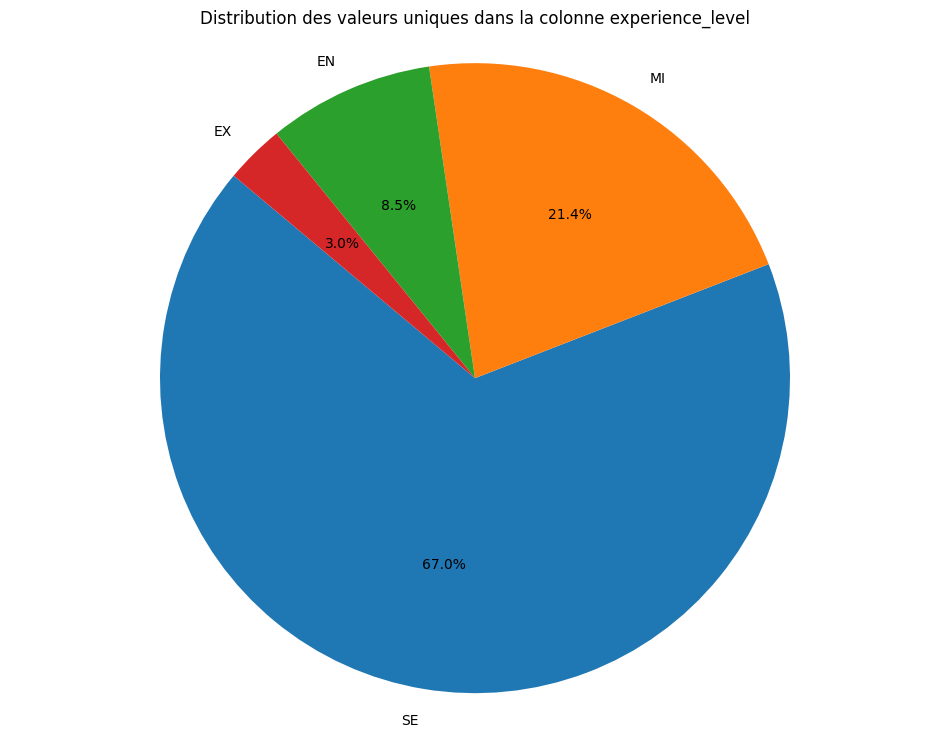

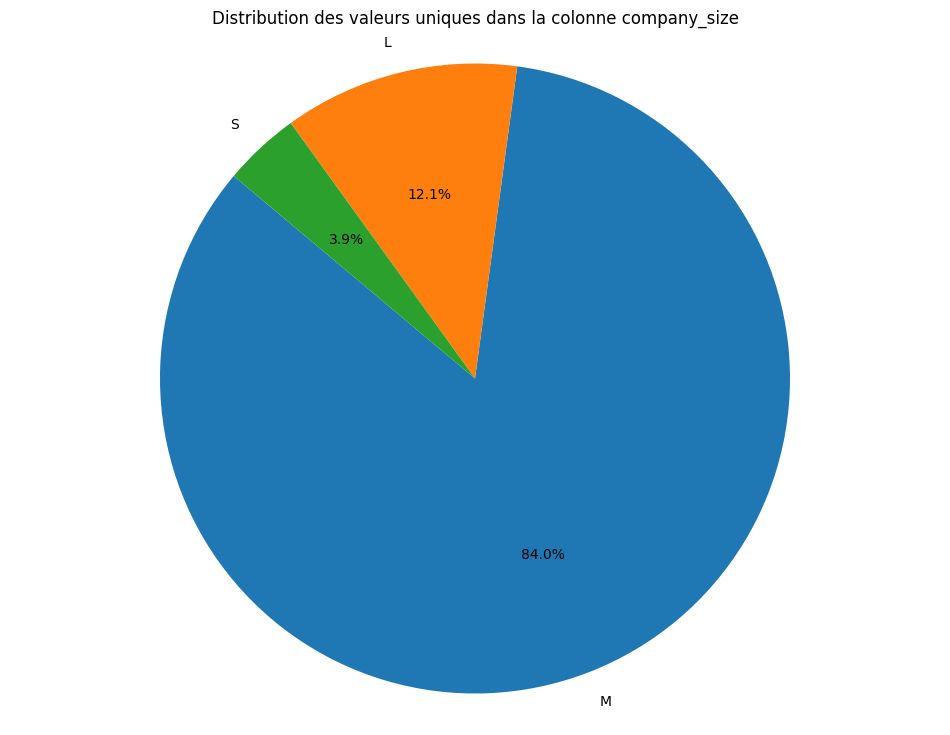

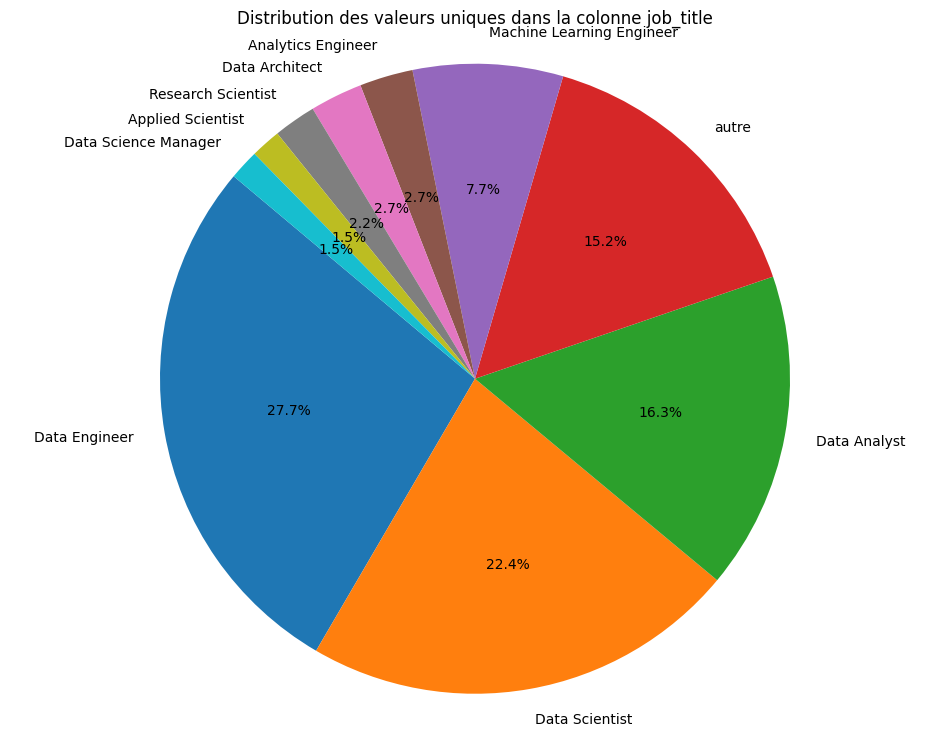

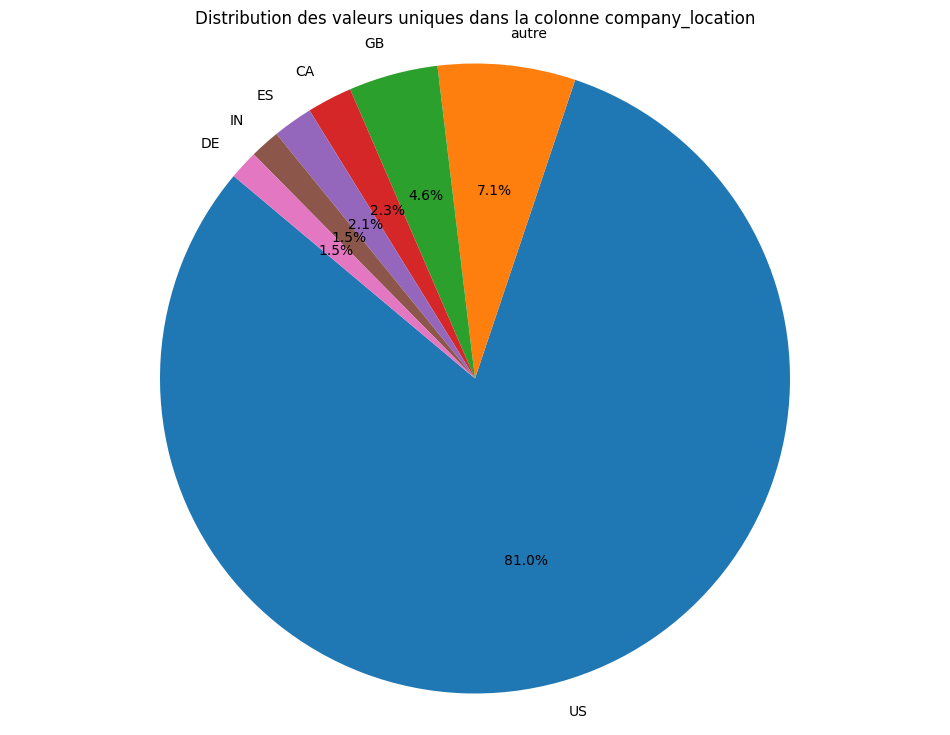

In [138]:
for i in liste :
    plt.figure(figsize=(12, 9))
    plt.pie(i, labels=i.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution des valeurs uniques dans la colonne {i.name}')
    plt.axis('equal')
    plt.show()

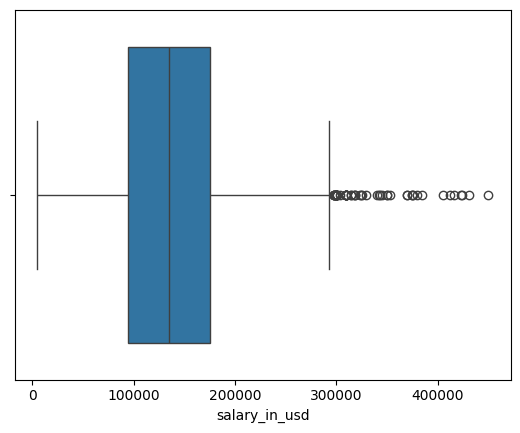

In [139]:
# Procédons à l'analyse des valeurs aberrantes pour identifier et comprendre les écarts significatifs ou les anomalies dans nos données.

sns.boxplot(x=data_df['salary_in_usd'])
plt.show()

In [140]:
from scipy import stats
import numpy as np

# Calculer le Z-score pour chaque valeur
z = np.abs(stats.zscore(data_df['salary_in_usd']))
threshold = 3

# Identifier les valeurs aberrantes
outliers = data_df[z > threshold]
print("Number of outliers: ", len(outliers))

Number of outliers:  22


In [141]:
outliers

,experience_level,job_title,salary_in_usd,company_location,company_size
33,SE,autre,342810,US,M
133,SE,Machine Learning Engineer,342300,US,L
228,EX,autre,329500,US,M
478,EX,autre,353200,US,M
528,SE,autre,423834,autre,L
649,SE,Data Architect,376080,US,M
845,MI,Research Scientist,340000,US,M
1105,SE,Data Scientist,370000,US,M
1258,SE,autre,375000,US,M
1288,SE,Data Analyst,385000,US,M


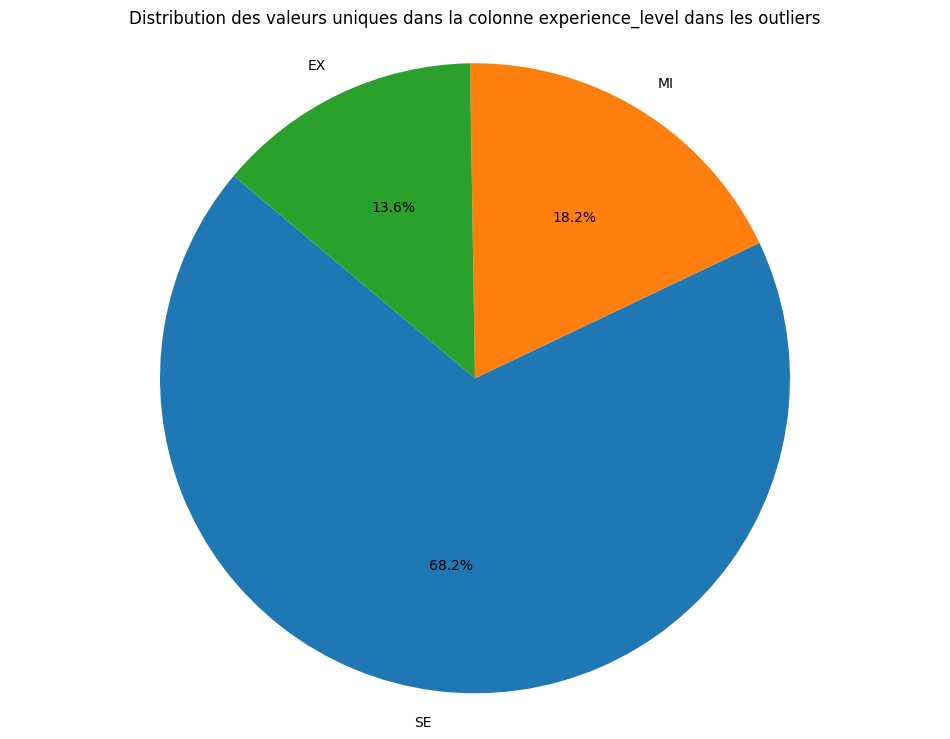

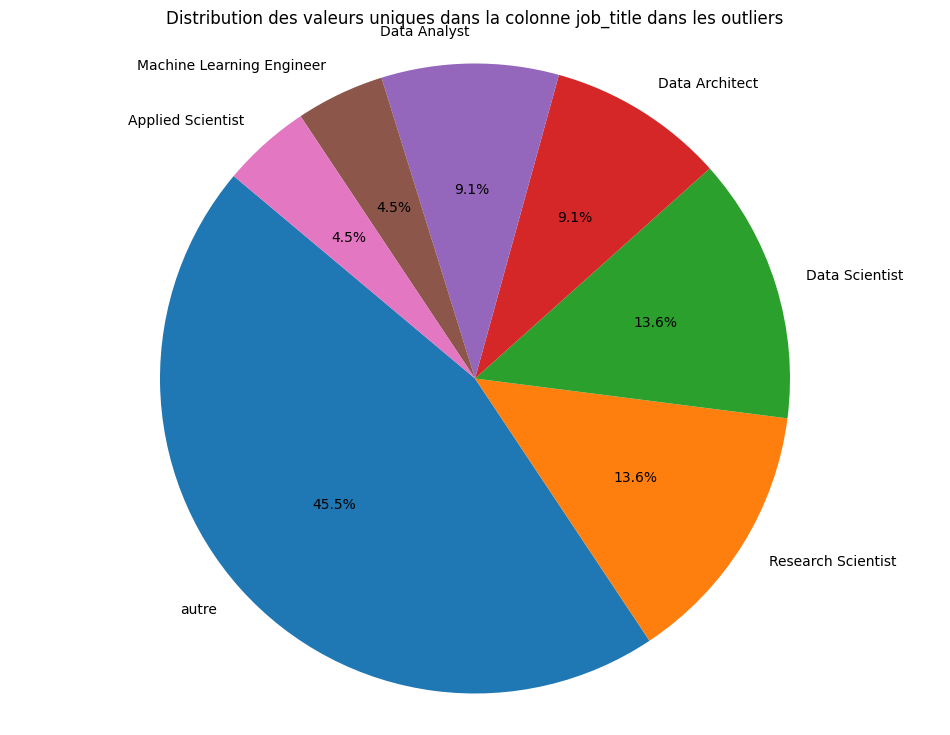

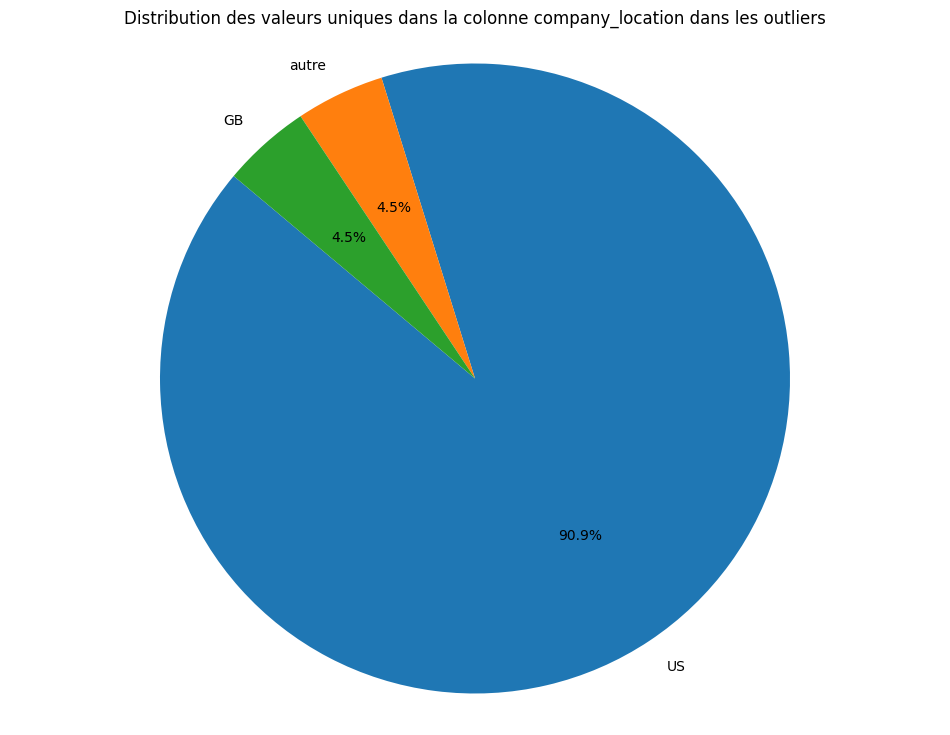

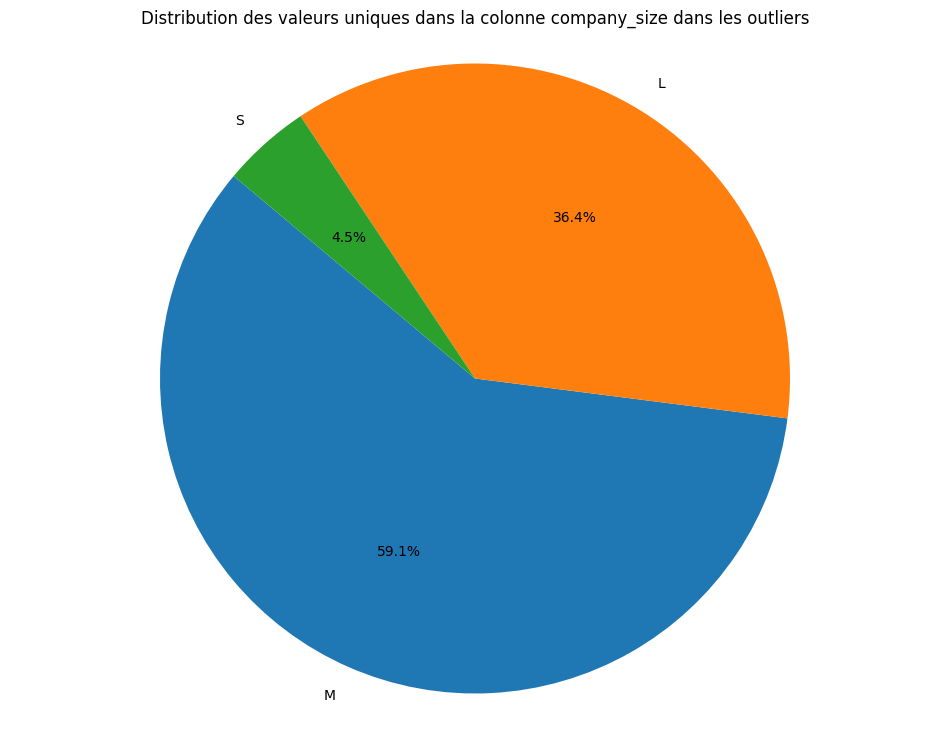

In [142]:
listes = [outliers['experience_level'].value_counts(normalize=True)*100, outliers['job_title'].value_counts(normalize=True)*100, outliers['company_location'].value_counts(normalize=True)*100, outliers['company_size'].value_counts(normalize=True)*100]

for i in listes :
    plt.figure(figsize=(12, 9))
    plt.pie(i, labels=i.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution des valeurs uniques dans la colonne {i.name} dans les outliers')
    plt.axis('equal')
    plt.show()

Je note que, parmi les valeurs aberrantes, le niveau d'expérience "Senior" est fréquemment mentionné, représentant 67% de la colonne experience_level dans le jeu de données initial. Pour la taille de l'entreprise, les catégories "Medium" (M) et "Large" (L) dominent parmi les valeurs aberrantes, avec respectivement 59,1% et 36,4% des occurrences. Néanmoins, la catégorie "Medium" (M) constitue 67% des données de la colonne company_size dans le jeu de données de base, tandis que la catégorie "Large" (L), ne représentant que 12% dans le jeu de données initial, apparaît de manière significative parmi les valeurs aberrantes.

In [144]:
# Analysons le salaire minimum en fonction de chaque attribut du jeu de données
listz=['job_title','experience_level','company_location','company_size']
for i in listz:
    resultat = data_df.groupby(i)['salary_in_usd'].min().sort_values()
    print(resultat)

job_title
autre                         5132
Data Scientist                5679
Data Analyst                  5723
Analytics Engineer            7500
Data Engineer                12000
Machine Learning Engineer    12000
Research Scientist           23000
Data Science Manager         54094
Data Architect               63000
Applied Scientist            72000
Name: salary_in_usd, dtype: int64
experience_level
MI     5132
EN     5409
SE     8000
EX    15000
Name: salary_in_usd, dtype: int64
company_location
autre     5132
IN        5409
US        5679
ES       10354
CA       15000
DE       15966
GB       30000
Name: salary_in_usd, dtype: int64
company_size
M    5132
L    5409
S    5679
Name: salary_in_usd, dtype: int64


In [145]:
# Analysons le salaire maximum en fonction de chaque attribut du jeu de données
listz=['job_title','experience_level','company_location','company_size']
for i in listz:
    resultat = data_df.groupby(i)['salary_in_usd'].max().sort_values()
    print(resultat)

job_title
Analytics Engineer           289800
Data Science Manager         300000
Data Engineer                324000
Machine Learning Engineer    342300
Applied Scientist            350000
Data Architect               376080
Data Scientist               412000
autre                        423834
Data Analyst                 430967
Research Scientist           450000
Name: salary_in_usd, dtype: int64
experience_level
EN    300000
EX    416000
SE    423834
MI    450000
Name: salary_in_usd, dtype: int64
company_location
ES       253750
CA       275000
DE       275000
IN       300000
autre    423834
GB       430967
US       450000
Name: salary_in_usd, dtype: int64
company_size
S    416000
L    423834
M    450000
Name: salary_in_usd, dtype: int64


In [146]:

ordre_level = {'EN': 1, 'MI': 2, 'SE': 3, 'EX':4}
data_df['experienxe_level_encodé'] = data_df['experience_level'].map(ordre_level)

ordre_size = {'S': 1, 'M': 2, 'L': 3}
data_df['company_size _encodé'] = data_df['company_size'].map(ordre_size)

data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   experience_level         3755 non-null   object
 1   job_title                3755 non-null   object
 2   salary_in_usd            3755 non-null   int64 
 3   company_location         3755 non-null   object
 4   company_size             3755 non-null   object
 5   experienxe_level_encodé  3755 non-null   int64 
 6   company_size _encodé     3755 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 205.5+ KB


In [147]:
correlation_spearman = data_df['salary_in_usd'].corr(data_df['experienxe_level_encodé'], method='spearman')
print("Corrélation de Spearman:", correlation_spearman)


Corrélation de Spearman: 0.4578140771086848


Une corrélation de Spearman de 0,45 suggère l'existence d'une relation positive modérée entre le salaire et le niveau d'expérience, indiquant que, généralement, à mesure que le niveau d'expérience augmente, le salaire a tendance à augmenter également.

In [148]:
correlation_spearman = data_df['salary_in_usd'].corr(data_df['company_size _encodé'], method='spearman')
print("Corrélation de Spearman:", correlation_spearman)

Corrélation de Spearman: -0.015739263560343


Une corrélation de Spearman de -0.01 révèle une relation négative négligeable entre le salaire et la taille de l'entreprise, suggérant qu'il n'y a pratiquement pas de lien direct entre la taille de l'entreprise et le niveau de salaire perçu.

In [149]:
import statsmodels.api as sm

X = sm.add_constant(data_df['experienxe_level_encodé'])
y = data_df['salary_in_usd']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     909.5
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          4.20e-179
Time:                        16:29:13   Log-Likelihood:                -46420.
No. Observations:                3755   AIC:                         9.284e+04
Df Residuals:                    3753   BIC:                         9.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

Bien que le modèle ait un R-square de 0.195, indiquant qu'il explique seulement 19,5% de la variance du salaire, la F-statistique élevée de 909,5 souligne que le niveau d'expérience joue un rôle significatif dans la détermination du salaire. De plus, une p-value très faible de 4.20e-179 confirme que nos résultats sont hautement significatifs et ne sont pas attribuables au hasard, soulignant l'importance de l'expérience dans l'influence sur le salaire.

In [150]:
import statsmodels.api as sm

X = sm.add_constant(data_df['company_size _encodé'])
y = data_df['salary_in_usd']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0005204
Date:                Sat, 24 Feb 2024   Prob (F-statistic):              0.982
Time:                        16:29:13   Log-Likelihood:                -46827.
No. Observations:                3755   AIC:                         9.366e+04
Df Residuals:                    3753   BIC:                         9.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.374e+05 

cependant pour la taille de l'entreprise on remarque que la variable n'influe pas du tout sur le salaire selon notre modele

### essayons des correlation multiple

In [151]:
X = data_df[['company_size _encodé', 'experienxe_level_encodé']] 
y = data_df['salary_in_usd'] 

# Ajouter une constante à X pour intercepter le terme
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     457.5
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          1.54e-178
Time:                        16:29:13   Log-Likelihood:                -46417.
No. Observations:                3755   AIC:                         9.284e+04
Df Residuals:                    3752   BIC:                         9.286e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Le modèle de régression montre que le niveau d'expérience et la taille de l'entreprise ont un impact statistiquement significatif sur le salaire, expliquant environ 19.6% de sa variabilité. Cependant, une grande part de la variation des salaires reste non expliquée par ces deux variables seules.

In [155]:
data_final = data_df.drop(['experienxe_level_encodé','company_size _encodé'], axis=1)
data_final.head()

,experience_level,job_title,salary_in_usd,company_location,company_size
0,SE,autre,85847,ES,L
1,MI,autre,30000,US,S
2,MI,autre,25500,US,S
3,SE,Data Scientist,175000,CA,M
4,SE,Data Scientist,120000,CA,M


In [158]:
data_final.to_csv('/Users/mahassadiadoumalickjean/Desktop/salary_data/data_final.csv', index=False)
